### _Single Nucleotide Polymorphism (SNP)_

- _Load SNP dataset (`parquet` format)_
- _Examine each example_
- _Test PyTorch Dataset class_
- _etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

### _SNP Dataset_

In [2]:
# load dataset
snp_data = pd.read_parquet("data/HO_data_filtered/HumanOrigins2067_filtered.parquet").to_numpy()
print(f"Shape of SNPs: {snp_data.shape}")

Shape of SNPs: (160858, 2067)


- _The dataset shape is `(n_markers, n_sample)`, however, we need shape of `(n_sample, n_markers)`. We can simply transpose the data:_

In [3]:
# transposed dataset shape
snp_data.T.shape

(2067, 160858)

In [4]:
# transposed dataset
snp_data = snp_data.T

In [5]:
# unique values
print(np.unique(snp_data))

[0. 1. 2. 9.]


- _Convert to `DataFrame`_

In [6]:
# numpy to dataframe
df = pd.DataFrame(snp_data)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,160848,160849,160850,160851,160852,160853,160854,160855,160856,160857
0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
# df.info()

In [9]:
# df.describe()

In [10]:
df.shape[0], df.shape[1]

(2067, 160858)

### _SNP Data Explanation_

_This dataset contains genotype data for `2,067` individuals across `160,858` SNP markers. The values `(0, 1, 2)` represent different genotype states for each SNP, indicating the genetic variation between individuals._

- *`Rows`: Each row corresponds to a person in the dataset - `2,067` individuals*

- *`Columns`: Each column corresponds to a specific SNP marker - `160,858` SNP markers*

- *`Values`: The values represent the genotypes for each individual and SNP. Genotypes are typically represented as:*

    - `0: Homozygous` reference (e.g., the individual has two copies of the reference allele).
    - `1: Heterozygous` (e.g., the individual has one copy of the reference allele and one copy of the alternate allele).
    - `2: Homozygous` alternate (e.g., the individual has two copies of the alternate allele).
    - `9: null` represent null/missing data (alternate `-1`)


In [11]:
# unique values in each column
df.apply(lambda col: col.unique(), axis=0)

0         [1.0, 0.0, 2.0, 9.0]
1         [0.0, 1.0, 2.0, 9.0]
2         [0.0, 1.0, 2.0, 9.0]
3         [2.0, 1.0, 0.0, 9.0]
4         [1.0, 2.0, 0.0, 9.0]
                  ...         
160853    [0.0, 2.0, 1.0, 9.0]
160854    [0.0, 9.0, 1.0, 2.0]
160855    [0.0, 1.0, 2.0, 9.0]
160856    [1.0, 0.0, 2.0, 9.0]
160857    [0.0, 1.0, 2.0, 9.0]
Length: 160858, dtype: object

In [12]:
# unique values in each row
df.apply(lambda row: row.unique(), axis=1)

0       [1.0, 0.0, 2.0, 9.0]
1       [1.0, 0.0, 2.0, 9.0]
2       [1.0, 0.0, 2.0, 9.0]
3       [1.0, 0.0, 2.0, 9.0]
4       [1.0, 0.0, 2.0, 9.0]
                ...         
2062    [1.0, 0.0, 2.0, 9.0]
2063    [0.0, 1.0, 2.0, 9.0]
2064    [1.0, 0.0, 2.0, 9.0]
2065    [0.0, 1.0, 2.0, 9.0]
2066    [0.0, 1.0, 2.0, 9.0]
Length: 2067, dtype: object

In [13]:
# missing values (column-wise)
df.isnull().sum(axis=0)

0         0
1         0
2         0
3         0
4         0
         ..
160853    0
160854    0
160855    0
160856    0
160857    0
Length: 160858, dtype: int64

In [14]:
# missing values (row-wise)
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2062    0
2063    0
2064    0
2065    0
2066    0
Length: 2067, dtype: int64

### _Minor Allele Frequency (MAF)_
MAF tells you how common the minor allele (e.g., 1 or 2) is in the population.

In [15]:
def maf(snp_column):
    counts = snp_column.value_counts(normalize=True)
    return min(counts)  # Minor allele frequency is the least frequent value

0         0.014514
1         0.001935
2         0.001451
3         0.006773
4         0.004838
            ...   
160853    0.005806
160854    0.005322
160855    0.000968
160856    0.001935
160857    0.002419
Length: 160858, dtype: float64


In [ ]:
maf_values = df.apply(maf)
print(maf_values)

### Plotting SNPs Histograms

In [20]:
def plot_all_snps(genotypes, filename):
    '''
    Plots a histogram of all genotype values in the flattened genotype matrix.

    :param genotypes: array of genotypes
    :param filename: filename (including path) to save plot to
    '''
    plt.figure()
    unique, counts = np.unique(genotypes, return_counts=True)
    d = zip(unique, counts)
    plt.hist(np.ndarray.flatten(genotypes), bins=10)
    if len(unique) < 5:
        plt.title(", ".join(["{:.2f} : {}".format(u, c) for (u, c) in d]), fontdict={'fontsize': 9})

    plt.xlabel("Genotype")
    plt.ylabel("Frequency")
    # plt.savefig(f"{filename}.pdf")
    plt.show()

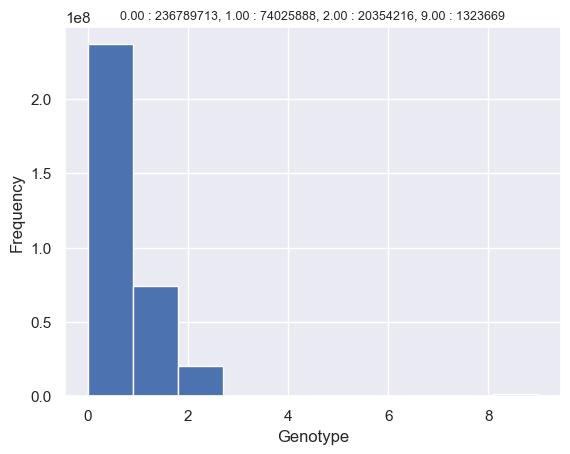

In [21]:
plot_all_snps(df.values, "all_genotypes_hist")

In [22]:
def plot_single_snp(genotypes, snp_index, filename):
    '''
    Plots a histogram for a single SNP (column of genotypes).
    
    :param genotypes: 2D numpy array (individuals x SNPs)
    :param snp_index: index (or column name) of the SNP to plot
    :param filename: output file path (without extension)
    '''
    plt.figure()
    snp = genotypes[:, snp_index]
    unique, counts = np.unique(snp, return_counts=True)
    d = zip(unique, counts)
    
    plt.hist(snp[~np.isnan(snp)], bins=10, range=(0, 2))  # assumes genotypes are 0,1,2
    if len(unique) < 5:
        plt.title(", ".join(["{:.0f} : {}".format(u, c) for (u, c) in d]), fontdict={'fontsize': 9})
    
    plt.xlabel("Genotype")
    plt.ylabel("Frequency")
    # plt.savefig(f"{filename}.pdf")
    plt.show()

- Plot a single SNP

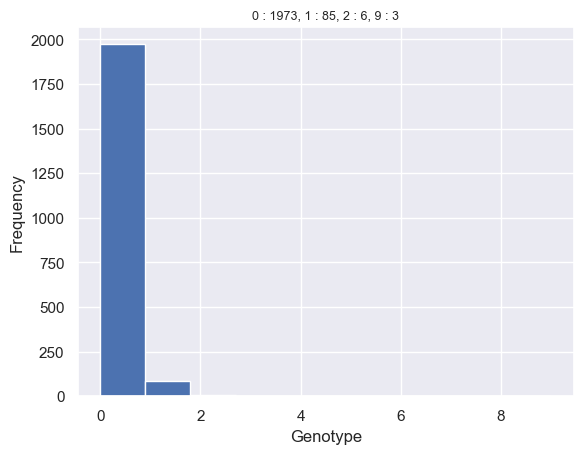

In [23]:
random_index = np.random.randint(df.shape[1])
plot_single_snp(df.values, random_index, f"snp_{random_index}_hist")

- Select 10 random SNPs